In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lzw(data, codeSize):
    x = 256
    dictionary = {chr(i): i for i in range(x)}
    maxTableSize = 2 ** codeSize
    string = ""
    compressed = []
    for symbol in data:
        string1 = string + chr(symbol)
        if string1 in dictionary:
            string = string1
        else:
            if len(dictionary) < maxTableSize:
                dictionary[string1] = x
                x += 1
            compressed.append(dictionary[string])
            string = chr(symbol)
    if string in dictionary:
        compressed.append(dictionary[string])

    return compressed

def lzw_encode(img, blockSize=-1, codeSize=12):
    file = open("img_lzwcode.txt", "w")
    lzwCompressed = []
    if blockSize == -1:
        blockSize = img.shape[0] * img.shape[1]
    file.write(str(img.shape[0]) + " " + str(img.shape[1]) + " " + str(blockSize) + "\n")
    img = img.reshape(-1)
    for i in range(0, img.shape[0], blockSize):
        data=img[i:i+blockSize]
        for j in data:
            file.write(str(j) + " ")
        file.write("\n")
        lzwCompressed += lzw(data, codeSize)
    
    return lzwCompressed

In [3]:
def lzwD(compressed):
    x = 256
    dictionary = dict([(i, chr(i)) for i in range(x)])
    string = ""
    decompressed = ""
    data = []
    for code in compressed:
        if not code in dictionary:
            dictionary[code] = string + (string[0])
        decompressed += dictionary[code]
        if not(len(string) == 0):
            dictionary[x] = string + (dictionary[code][0])
            x += 1
        string = dictionary[code]
    
    for char in decompressed:
        data.append(ord(char))
    
    return data
            

def lzw_decode(lzwEncodedArray):
    data = lzwD(lzwEncodedArray)
    return np.array(data)

In [4]:
def analysis(filename, blockSize=-1, codeSize=12):
    img = cv.imread(filename, 0)
    lzwEncodedArray = lzw_encode(img, blockSize, codeSize)

    # Maximum coded value used
    maxCodedValue = max(lzwEncodedArray)
    print("Maximum Coded Value: ", maxCodedValue)

    # Number of codes 
    print("Number of codes: ", len(lzwEncodedArray))

    # Compression Ratio
    compRatio = (img.shape[0] * img.shape[1])/len(lzwEncodedArray)
    print("Compression Ratio: ", compRatio)

    # Average length of code
    avgCodeLength = len(lzwEncodedArray) * codeSize / (img.shape[0] * img.shape[1])
    print("Average Code Length: ", avgCodeLength)

    # Entropy
    entropy = 0
    for i in range(256):
        p = lzwEncodedArray.count(i) / len(lzwEncodedArray)
        if p != 0:
            entropy += p * np.log2(p)
    entropy = -entropy
    print("Entropy: ", entropy)

    txtFile = 'img_lzwcode.txt'
    file = open(txtFile, 'r')
    lzwEncodedArray = []
    i = -1
    for line in file:
        if i == -1:
            h, w, blockSize = line.split()
            h, w, blockSize = int(h), int(w), int(blockSize)
            decodedImg = np.zeros((h * w), dtype=np.uint8)
            i = 0
            continue
        lzwEncodedArray = line.split()
        lzwEncodedArray = [int(x) for x in lzwEncodedArray]
        decodedImg[i:i+blockSize] = lzw_decode(lzwEncodedArray)
        i += blockSize
    decodedImg = decodedImg.reshape(h, w)

    plt.figure(figsize=(10, 10))
    plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title("Original Image"); plt.axis('off')
    plt.subplot(122); plt.imshow(decodedImg, cmap='gray'); plt.title("Decoded Image"); plt.axis('off')

Maximum Coded Value:  4094
Number of codes:  258105
Compression Ratio:  1.5234730051723135
Average Code Length:  7.876739501953125
Entropy:  4.059981018181138


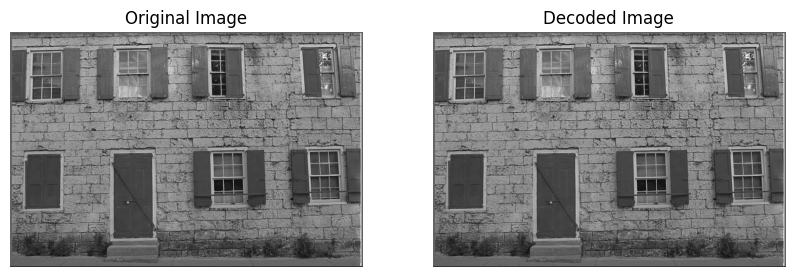

In [5]:
analysis("test/kodim01.png")

Maximum Coded Value:  4095
Number of codes:  169092
Compression Ratio:  2.325455964800227
Average Code Length:  5.1602783203125
Entropy:  1.848111494432504


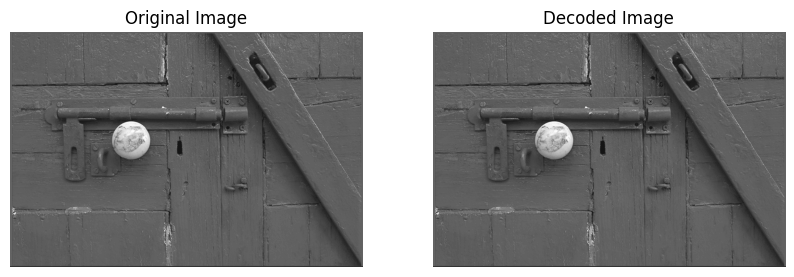

In [6]:
analysis("test/kodim02.png")

Maximum Coded Value:  4094
Number of codes:  238312
Compression Ratio:  1.6500050354157576
Average Code Length:  7.272705078125
Entropy:  4.218210396236586


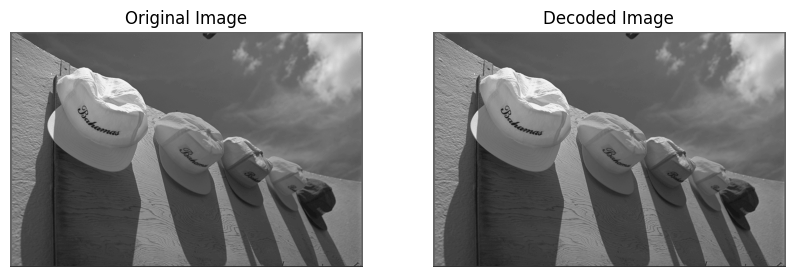

In [7]:
analysis("test/kodim03.png")